<a href="https://colab.research.google.com/github/ghaidadanaya/Analisis-MultiAff/blob/main/Kepeungurusan_KUPVA_BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisis Konglomerasi KUPVA BB di KPw Jakarta

###Intstal Lib

In [ ]:
!pip install pyvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from google.colab import files
from IPython.display import display, HTML
from pyvis.network import Network
import networkx as nx

##Upload Data

In [ ]:
uploaded = files.upload()

import io
df = pd.read_excel(io.BytesIO(uploaded['KupvaBB.xlsx'])) # Ganti 'your_excel_file.xlsx' dengan nama file excel Anda

print(df.head())
print(df.info())

Saving KupvaBB.xlsx to KupvaBB.xlsx
          nama_penyelenggara        wilayah                id           nama  \
0  PT ABADI MAKMUR VALASINDO  Jakarta Utara  3174094408900004  Eva Santriana   
1  PT ABADI MAKMUR VALASINDO  Jakarta Utara  3174094202940001  Ersa Febriana   
2  PT ABADI MAKMUR VALASINDO  Jakarta Utara  3174094202940001  Ersa Febriana   
3  PT ABADI MAKMUR VALASINDO  Jakarta Utara  3174094408900004  Eva Santriana   
4           PT ABLE EXCHANGE  Jakarta Barat  3275065607950000  Jesslyn Tania   

            peran presentase_saham  jumlah_saham  nominal_saham  
0        Direktur              NaN           NaN            NaN  
1       Komisaris              NaN           NaN            NaN  
2  Pemegang Saham              0.3          75.0     75000000.0  
3  Pemegang Saham              0.7         175.0    175000000.0  
4        Direktur              NaN           NaN            NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593 entries, 0 to 1592
Data columns 

In [ ]:
df.columns


Index(['nama_penyelenggara', 'wilayah', 'id', 'nama', 'peran',
       'presentase_saham', 'jumlah_saham', 'nominal_saham'],
      dtype='object')

##Total Penyelenggara KUPVA BB di KPw Jakarta

In [ ]:
print(len(df['nama_penyelenggara'].unique()))

320


##Persebaran Wilayah

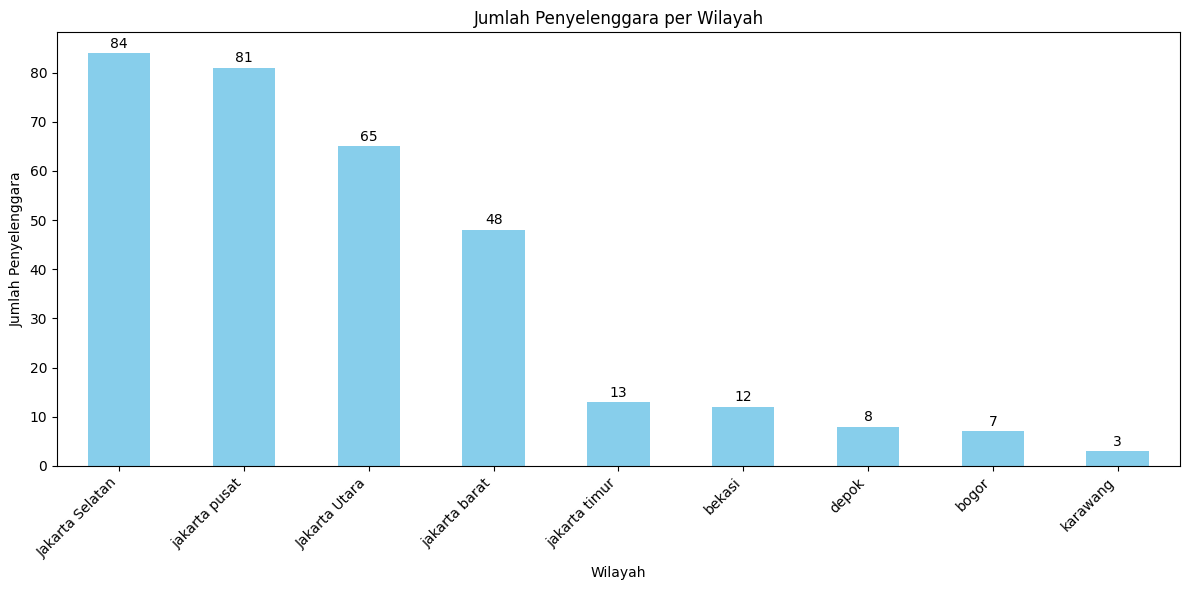

,nama_penyelenggara
wilayah,
Jakarta Selatan,84
jakarta pusat,81
Jakarta Utara,65
jakarta barat,48
jakarta timur,13
bekasi,12
depok,8
bogor,7
karawang,3


In [ ]:
df['wilayah'] = df['wilayah'].str.lower().replace({'jakarta utara': 'Jakarta Utara', 'jakarta selatan': 'Jakarta Selatan'})

# Group by 'Wilayah' and count the number of unique 'Nama_Penyelenggara'
penyelenggara_per_wilayah = df.groupby('wilayah')['nama_penyelenggara'].nunique().sort_values(ascending=False)


# Create a bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size for better visualization
penyelenggara_per_wilayah.plot(kind='bar', color='skyblue')
plt.title('Jumlah Penyelenggara per Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Jumlah Penyelenggara')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Add the count on top of each bar
for i, v in enumerate(penyelenggara_per_wilayah):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom') # Adjust vertical position as needed

plt.show()

penyelenggara_per_wilayah

##Total Nama yang ada di >1 Penyelenggara

In [ ]:
nama_penyelenggara_groups = df.groupby('nama')['nama_penyelenggara'].unique()

# Filter for names that appear in more than one 'Nama_Penyelenggara'
names_with_multiple_organizers = nama_penyelenggara_groups[nama_penyelenggara_groups.apply(len) > 1]

# Iterate through the filtered names
for name, organizers in names_with_multiple_organizers.items():
    print(f"{name}")
    # ... (rest of the code)

print(f"\nTotal Nama yang ada di lebih dari 1 penyelenggara baik sebagai pengurus/pemegang saham/keduanya: {len(names_with_multiple_organizers)}")

# Create a network graph
net = Network(notebook=True, cdn_resources='in_line', width="100%", height="655px")

# Add nodes and edges to the network
for name, organizers in names_with_multiple_organizers.items():
    net.add_node(name, label=name, color='blue', title=name)  # Nama node (biru langit)
    for organizer in organizers:
        # Check if organizer is not NaN before adding the node
        if pd.notna(organizer): # This condition will make sure only valid values are passed as node IDs
            net.add_node(organizer, label=organizer, color='red', title=organizer) # Nama_Penyelenggara node (hijau muda)
            roles = df[(df['nama'] == name) & (df['nama_penyelenggara'] == organizer)]['peran'].unique()
            roles = [str(role) for role in roles]  # Convert to strings
            net.add_edge(name, organizer, title=", ".join(roles), label=", ".join(roles))

# Customize the network appearance (optional)
net.repulsion(node_distance=500, spring_length=500)  # Adjust repulsion for better spacing

# Filter untuk peran pengurus dan pemegang saham
peran_pengurus_saham = ['Direktur', 'Komisaris', 'Direktur Utama', 'Komisaris Utama', 'Pemegang Saham']
df_filtered = df[df['peran'].isin(peran_pengurus_saham)]

# Grouping untuk nama yang muncul di lebih dari satu penyelenggara
nama_penyelenggara_counts = df_filtered.groupby('nama')['nama_penyelenggara'].nunique()
nama_muncul_lebih_satu = nama_penyelenggara_counts[nama_penyelenggara_counts > 1]

from pyvis.network import Network

net = Network(notebook=True, cdn_resources='in_line', height='800px', width='100%')

# Build graph: tambah node + edge
for name in nama_muncul_lebih_satu.index:
    penyelenggara_list = df_filtered[df_filtered['nama'] == name]['nama_penyelenggara'].unique()
    net.add_node(name, label=name, color='blue', title=name)
    for organizer in penyelenggara_list:
        net.add_node(organizer, label=organizer, color='red', title=organizer)
        roles = df_filtered[(df_filtered['nama'] == name) & (df_filtered['nama_penyelenggara'] == organizer)]['peran'].unique()
        roles_str = ", ".join(roles)
        net.add_edge(name, organizer, title=roles_str, label=roles_str)

# Interaktif HTML
html_graph = net.generate_html()

# Daftar nama dan perannya
info_html = "<h2>Daftar Nama & Peran per Penyelenggara</h2><ul>"
for name in nama_muncul_lebih_satu.index:
    penyelenggara_list = df_filtered[df_filtered['nama'] == name]['nama_penyelenggara'].unique()
    info_html += f"<li><a href='#' onclick=\"focusNode('{name}')\"><strong>{name} ({len(penyelenggara_list)})</strong></a><ul>"
    for org in penyelenggara_list:
        peran = df_filtered[(df_filtered['nama'] == name) & (df_filtered['nama_penyelenggara'] == org)]['peran'].unique()
        peran_str = ", ".join(peran)
        info_html += f"<li><a href='#' onclick=\"focusNode('{org}')\">Peran di {org}</a>: {peran_str}</li>"
    info_html += "</ul></li>"
info_html += "</ul>"

# JavaScript & HTML layout
js_focus = """
<script>
  var network;
  function focusNode(nodeId) {
    network.focus(nodeId, {
      scale: 1.5,
      animation: {
        duration: 1000,
        easingFunction: "easeInOutQuad",
      },
    });
  }

  function searchFunction() {
    var input = document.getElementById("searchBox");
    var filter = input.value.toUpperCase();
    var li = document.querySelectorAll("ul li");
    li.forEach(function(item) {
      var text = item.textContent || item.innerText;
      item.style.display = text.toUpperCase().indexOf(filter) > -1 ? "" : "none";
    });
  }
</script>
"""

full_html = f"""
<html>
<head>
  <meta charset="utf-8">
  <title>Network Gabungan</title>
  <style>
    html, body {{
      margin: 0;
      padding: 0;
      overflow: hidden;
      height: 100%;
      font-family: Arial, sans-serif;
    }}
    #container {{
      display: flex;
      height: 100vh;
    }}
    #graph {{
      flex: 2;
    }}
    #info {{
      flex: 1;
      overflow-y: auto;
      padding: 20px;
      background: #f9f9f9;
    }}
    #searchBox {{
      width: 100%;
      padding: 8px;
      margin-bottom: 10px;
    }}
  </style>
</head>
<body>
<div id="container">
  <div id="graph">{html_graph}</div>
  <div id="info">
    <input type="text" id="searchBox" placeholder="Cari Nama atau Penyelenggara" onkeyup="searchFunction()">
    {info_html}
  </div>
</div>
{js_focus}
<script>
  window.onload = function() {{
    network = window.network || null;
  }};
</script>
</body>
</html>
"""

# Simpan dan download
with open("mix.html", "w", encoding="utf-8") as f:
    f.write(full_html)

from google.colab import files
files.download("mix.html")


Agus Sardjono
Benny Hira
Cahyo Marwanto
Catur Adi Nugroho
Daniel
Deni Setiyanto
Desti Handayani
Didik Eko Setiawan
Edi Rahmanudin
Erik Hindrawan
Erlin
Ferry Lukito
Francyanto Widjaja
Gede Mahardikawan
Hariram
Haris Kristanto
Huang Ai Ling
Johannes Simbolon
Julianto
Lucky Indrawan Ramli
Mauliddiansyah
Michael
Natali Lukito
Natalia
Nenny
Nioe Suat Lee
Parna
Popy Surjanto
Radila Lutfiani
Rakhmad Fajar Trihandono
Regina
Renaldy Effendy
Sisilia Yuliana Dwi Kartika
Sugiarto
Sugito
Supianto Tunas
Susiana
Teddy Kurniawan
Temmy Irvan Gushendra
Tri Utami
Umar Zed
Vanny Prawata
Vinsensia Lusiana
Yohana Cathy
Yohannes

Total Nama yang ada di lebih dari 1 penyelenggara baik sebagai pengurus/pemegang saham/keduanya: 45


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Total Nama yang ada di >1 Penyelenggara (Pemegang Saham)

In [ ]:
# Filter the DataFrame for 'Peran' equal to 'Pemegang Saham'
df_pemegang_saham = df[df['peran'] == 'Pemegang Saham']

# Group by 'Nama' and get unique 'Nama_Penyelenggara'
nama_penyelenggara_groups = df_pemegang_saham.groupby('nama')['nama_penyelenggara'].unique()

# Filter for names appearing in more than one 'Nama_Penyelenggara'
names_with_multiple_organizers = nama_penyelenggara_groups[nama_penyelenggara_groups.apply(len) > 1]

# Print the names
print("Nama yang muncul di lebih dari satu Nama_Penyelenggara (sebagai Pemegang Saham):")
for name in names_with_multiple_organizers.index:
    print(name)

# Print the total count
print(f"\nTotal Nama: {len(names_with_multiple_organizers)}")

# Create the network graph
net = Network(notebook=True, cdn_resources='in_line', width="100%", height="800px")

# Add nodes and edges
for name, organizers in names_with_multiple_organizers.items():
    net.add_node(name, label=name, color='blue', title=name)
    for organizer in organizers:
        if pd.notna(organizer):
            net.add_node(organizer, label=organizer, color='red', title=organizer)
            info_rows = df_pemegang_saham[
                (df_pemegang_saham['nama'] == name) &
                (df_pemegang_saham['nama_penyelenggara'] == organizer)
            ]

net.add_edge(name, org, title=roles_str, label=roles_str)

net.repulsion(node_distance=150, spring_length=200)

# Simpan HTML dari pyvis
html_graph = net.generate_html()

# Tambahan JavaScript untuk fitur klik dan search
js_focus = """
<script>
  var network;

  function focusNode(nodeId) {
    network.focus(nodeId, {
      scale: 1.5,
      animation: {
        duration: 1000,
        easingFunction: "easeInOutQuad",
      },
    });
  }

  function searchFunction() {
    var input = document.getElementById("searchBox");
    var filter = input.value.toUpperCase();
    var li = document.querySelectorAll("ul li");
    li.forEach(function(item) {
      var text = item.textContent || item.innerText;
      item.style.display = text.toUpperCase().indexOf(filter) > -1 ? "" : "none";
    });
  }
</script>
"""

# HTML kanan (nama dan penyelenggara yang bisa diklik)
info_html = "<h2>Daftar Nama & Peran per Penyelenggara</h2><ul>"
for name in names_with_multiple_organizers.index:
    organizers = df_pemegang_saham[df_pemegang_saham['nama'] == name]['nama_penyelenggara'].unique()
    info_html += f"<li><a href='#' onclick=\"focusNode('{name}')\"><strong>{name} ({len(organizers)})</strong></a><ul>"
    for org in organizers:
        peran = df_pemegang_saham[
            (df_pemegang_saham['nama'] == name) &
            (df_pemegang_saham['nama_penyelenggara'] == org)
        ]['peran'].unique()
        peran_str = ", ".join(peran)
        info_html += f"<li><a href='#' onclick=\"focusNode('{org}')\">Peran di {org}</a>: {peran_str}</li>"
    info_html += "</ul></li>"
info_html += "</ul>"

# Full layout HTML
full_html = f"""
<html>
<head>
  <meta charset="utf-8">
  <title>Network Pemegang Saham</title>
  <style>
    html, body {{
      margin: 0;
      padding: 0;
      overflow: hidden;
      height: 100%;
      font-family: Arial, sans-serif;
    }}
    #container {{
      display: flex;
      height: 100vh;
    }}
    #graph {{
      flex: 2;
    }}
    #info {{
      flex: 1;
      overflow-y: auto;
      padding: 20px;
      background: #f9f9f9;
    }}
    #searchBox {{
      width: 100%;
      padding: 8px;
      margin-bottom: 10px;
    }}
  </style>
</head>
<body>
<div id="container">
  <div id="graph">{html_graph}</div>
  <div id="info">
    <input type="text" id="searchBox" placeholder="Cari Nama atau Penyelenggara" onkeyup="searchFunction()">
    {info_html}
  </div>
</div>
{js_focus}
<script>
  window.onload = function() {{
    network = window.network || null;
  }};
</script>
</body>
</html>
"""

# Simpan file interaktif
with open("pemegangsaham.html", "w", encoding="utf-8") as f:
    f.write(full_html)

from google.colab import files
files.download("pemegangsaham.html")

Nama yang muncul di lebih dari satu Nama_Penyelenggara (sebagai Pemegang Saham):
Benny Hira
Cahyo Marwanto
Catur Adi Nugroho
Desti Handayani
Didik Eko Setiawan
Edi Rahmanudin
Erlin
Ferry Lukito
Francyanto Widjaja
Gede Mahardikawan
Hariram
Haris Kristanto
Huang Ai Ling
Johannes Simbolon
Julianto
Michael
Natali Lukito
Nenny
Nioe Suat Lee
Parna
Popy Surjanto
Rakhmad Fajar Trihandono
Renaldy Effendy
Sisilia Yuliana Dwi Kartika
Sugiarto
Supianto Tunas
Susiana
Teddy Kurniawan
Temmy Irvan Gushendra
Tri Utami
Umar Zed
Vinsensia Lusiana
Yohana Cathy
Yohannes

Total Nama: 34


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Filter hanya Pemegang Saham
filtered_df = df[df['peran'] == 'Pemegang Saham']

# Cari nama yang ada di >1 penyelenggara
nama_penyelenggara_counts = filtered_df.groupby('nama')['nama_penyelenggara'].nunique()
names_multiple_organizers = nama_penyelenggara_counts[nama_penyelenggara_counts > 1]

# Print the names
print("Nama yang muncul di lebih dari satu Nama_Penyelenggara (sebagai Pemegang Saham):")
for name in names_multiple_organizers.index:
    print(name)

# Print the total count
print(f"\nTotal Nama: {len(names_multiple_organizers)}")

# Buat graph
net = Network(notebook=True, cdn_resources='in_line', width="100%", height="655px")

for name in names_multiple_organizers.index:
    organizers = filtered_df[filtered_df['nama'] == name]['nama_penyelenggara'].unique()
    net.add_node(name, label=name, color='blue', title=name)
    for org in organizers:
        roles = filtered_df[(filtered_df['nama'] == name) & (filtered_df['nama_penyelenggara'] == org)]['peran'].unique()
        roles_str = ", ".join(roles)
        net.add_node(org, label=org, color='red', title=org)
        net.add_edge(name, org, title=roles_str, label=roles_str)

net.repulsion(node_distance=150, spring_length=200)

# Daftar info HTML
info_html = "<h2>Daftar Nama & Peran per Penyelenggara</h2><ul>"
for name in names_multiple_organizers.index:
    orgs = filtered_df[filtered_df['nama'] == name]['nama_penyelenggara'].unique()
    info_html += f"<li><strong>{name} ({len(orgs)})</strong><ul>"
    for org in orgs:
        peran = filtered_df[(filtered_df['nama'] == name) & (filtered_df['nama_penyelenggara'] == org)]['peran'].unique()
        peran_str = ", ".join(peran)
        info_html += f"<li>Peran di {org}: {peran_str}</li>"
    info_html += "</ul></li>"
info_html += "</ul>"

# Search bar
search_html = """
<input type="text" id="searchBox" placeholder="Cari Nama atau Penyelenggara" onkeyup="searchFunction()" style="width: 100%; padding: 8px;">
<script>
function searchFunction() {
  var input, filter, ul, li, i, txtValue;
  input = document.getElementById("searchBox");
  filter = input.value.toUpperCase();
  ul = document.querySelector("ul");
  li = ul.getElementsByTagName("li");
  for (i = 0; i < li.length; i++) {
    txtValue = li[i].textContent || li[i].innerText;
    li[i].style.display = txtValue.toUpperCase().indexOf(filter) > -1 ? "" : "none";
  }
}
</script>
"""

# Tambahan JavaScript untuk klik fokus
js_focus = """
<script>
  var network;
  function focusNode(nodeId) {
    network.focus(nodeId, {
      scale: 2,
      animation: { duration: 1000, easingFunction: "easeInOutQuad" }
    });
  }
  function searchFunction() {
    var input = document.getElementById("searchBox");
    var filter = input.value.toUpperCase();
    var li = document.querySelectorAll("ul li");
    li.forEach(function(item) {
      var text = item.textContent || item.innerText;
      item.style.display = text.toUpperCase().indexOf(filter) > -1 ? "" : "none";
    });
  }
</script>
"""

# HTML info kanan
info_html = "<h2>Daftar Nama & Peran per Penyelenggara</h2><ul>"
for name in names_multiple_organizers.index:
    organizers = filtered_df[filtered_df['nama'] == name]['nama_penyelenggara'].unique()
    info_html += f"<li><a href='#' onclick=\"focusNode('{name}')\"><strong>{name} ({len(organizers)})</strong></a><ul>"
    for org in organizers:
        peran = filtered_df[
            (filtered_df['nama'] == name) &
            (filtered_df['nama_penyelenggara'] == org)
        ]['peran'].unique()
        peran_str = ", ".join(peran)
        info_html += f"<li><a href='#' onclick=\"focusNode('{org}')\">Peran di {org}</a>: {peran_str}</li>"
    info_html += "</ul></li>"
info_html += "</ul>"

# Gabungan HTML
full_html = f"""
<html>
<head>
  <meta charset="utf-8">
  <title>Network Pemegang Saham</title>
  <style>
    html, body {{
      margin: 0;
      padding: 0;
      overflow: hidden;
      height: 100%;
      font-family: Arial, sans-serif;
    }}
    #container {{
      display: flex;
      height: 100vh;
    }}
    #graph {{
      flex: 2;
    }}
    #info {{
      flex: 1;
      overflow-y: auto;
      padding: 20px;
      background: #f9f9f9;
    }}
    #searchBox {{
      width: 100%;
      padding: 8px;
      margin-bottom: 10px;
    }}
  </style>
</head>
<body>
<div id="container">
  <div id="graph">{net.generate_html()}</div>
  <div id="info">
    <input type="text" id="searchBox" placeholder="Cari Nama atau Penyelenggara" onkeyup="searchFunction()">
    {info_html}
  </div>
</div>
{js_focus}
<script>
  window.onload = function() {{
    network = window.network || null;
  }};
</script>
</body>
</html>
"""

# Simpan HTML
with open("pemegang_saham_only.html", "w", encoding="utf-8") as f:
    f.write(full_html)

from google.colab import files
files.download("pemegang_saham_only.html")


Nama yang muncul di lebih dari satu Nama_Penyelenggara (sebagai Pemegang Saham):
Benny Hira
Cahyo Marwanto
Catur Adi Nugroho
Desti Handayani
Didik Eko Setiawan
Edi Rahmanudin
Erlin
Ferry Lukito
Francyanto Widjaja
Gede Mahardikawan
Hariram
Haris Kristanto
Huang Ai Ling
Johannes Simbolon
Julianto
Michael
Natali Lukito
Nenny
Nioe Suat Lee
Parna
Popy Surjanto
Rakhmad Fajar Trihandono
Renaldy Effendy
Sisilia Yuliana Dwi Kartika
Sugiarto
Supianto Tunas
Susiana
Teddy Kurniawan
Temmy Irvan Gushendra
Tri Utami
Umar Zed
Vinsensia Lusiana
Yohana Cathy
Yohannes

Total Nama: 34


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Total Nama yang ada di >1 Penyelenggara (Pengurus)

In [ ]:
# Filter hanya pengurus
filtered_df = df[~df['peran'].isin(['Pemegang Saham'])]

# Cari nama yang ada di >1 penyelenggara
nama_penyelenggara_counts = filtered_df.groupby('nama')['nama_penyelenggara'].nunique()
names_multiple_organizers = nama_penyelenggara_counts[nama_penyelenggara_counts > 1]

# Print the names
print("Nama yang muncul di lebih dari satu Nama_Penyelenggara (sebagai pengurus):")
for name in names_multiple_organizers.index:
    print(name)

# Print the total count
print(f"\nTotal Nama: {len(names_multiple_organizers)}")

# Buat graph
net = Network(notebook=True, cdn_resources='in_line', width="100%", height="655px") #heading="Koneksi Pengurus ke Penyelenggara")

for name in names_multiple_organizers.index:
    organizers = filtered_df[filtered_df['nama'] == name]['nama_penyelenggara'].unique()
    net.add_node(name, label=name, color='blue', title=name)
    for org in organizers:
        roles = filtered_df[(filtered_df['nama'] == name) & (filtered_df['nama_penyelenggara'] == org)]['peran'].unique()
        roles_str = ", ".join(roles)
        net.add_node(org, label=org, color='red', title=org)
        net.add_edge(name, org, title=roles_str, label=roles_str)

net.repulsion(node_distance=150, spring_length=200)

# Buat HTML info tambahan
info_html = "<h2>Daftar Nama & Peran per Penyelenggara</h2><ul>"
for name in names_multiple_organizers.index:
    orgs = filtered_df[filtered_df['nama'] == name]['nama_penyelenggara'].unique()
    info_html += f"<li><strong>{name} ({len(orgs)})</strong><ul>"
    for org in orgs:
        peran = filtered_df[(filtered_df['nama'] == name) & (filtered_df['nama_penyelenggara'] == org)]['peran'].unique()
        peran_str = ", ".join(peran)
        info_html += f"<li>Peran di {org}: {peran_str}</li>"
    info_html += "</ul></li>"
info_html += "</ul>"

# Tambahkan search bar dan gabungkan
search_html = """
<input type="text" id="searchBox" placeholder="Cari Nama atau Penyelenggara" onkeyup="searchFunction()" style="width: 100%; padding: 8px;">
<script>
function searchFunction() {
  var input, filter, ul, li, a, i, txtValue;
  input = document.getElementById("searchBox");
  filter = input.value.toUpperCase();
  ul = document.querySelector("ul");
  li = ul.getElementsByTagName("li");
  for (i = 0; i < li.length; i++) {
    txtValue = li[i].textContent || li[i].innerText;
    if (txtValue.toUpperCase().indexOf(filter) > -1) {
      li[i].style.display = "";
    } else {
      li[i].style.display = "none";
    }
  }
}
</script>
"""

full_html = f"""
<html>
<head><meta charset="utf-8"><title>Network Graph</title></head>
<body style="display:flex; flex-direction:row;">
<div style="flex: 2; border-right: 1px solid #ccc;">{net.generate_html()}</div>
<div style="flex: 1; padding: 20px; overflow-y: auto; max-height: 800px;">
    {search_html}
    {info_html}
</div>
</body>
</html>
"""

# Tambahan JS untuk scroll dan klik fokus ke node
js_focus = """
<script>
  var network;

  function focusNode(nodeId) {
    network.focus(nodeId, {
      scale: 2,
      animation: {
        duration: 1000,
        easingFunction: "easeInOutQuad",
      },
    });
  }

  function searchFunction() {
    var input = document.getElementById("searchBox");
    var filter = input.value.toUpperCase();
    var li = document.querySelectorAll("ul li");
    li.forEach(function(item) {
      var text = item.textContent || item.innerText;
      item.style.display = text.toUpperCase().indexOf(filter) > -1 ? "" : "none";
    });
  }
</script>
"""

# HTML kanan (nama yang bisa diklik)
info_html = "<h2>Daftar Nama & Peran per Penyelenggara</h2><ul>"
for name in names_multiple_organizers.index:
    organizers = filtered_df[filtered_df['nama'] == name]['nama_penyelenggara'].unique()
    info_html += f"<li><a href='#' onclick=\"focusNode('{name}')\"><strong>{name} ({len(organizers)})</strong></a><ul>"
    for org in organizers:
        peran = filtered_df[(filtered_df['nama'] == name) & (filtered_df['nama_penyelenggara'] == org)]['peran'].unique()
        peran_str = ", ".join(peran)
        info_html += f"<li><a href='#' onclick=\"focusNode('{org}')\">Peran di {org}</a>: {peran_str}</li>"
    info_html += "</ul></li>"
info_html += "</ul>"

# Full layout HTML
full_html = f"""
<html>
<head>
  <meta charset="utf-8">
  <title>Network Graph</title>
  <style>
    html, body {{
      margin: 0;
      padding: 0;
      overflow: hidden;
      height: 100%;
      font-family: Arial, sans-serif;
    }}
    #container {{
      display: flex;
      height: 100vh;
    }}
    #graph {{
      flex: 2;
    }}
    #info {{
      flex: 1;
      overflow-y: auto;
      padding: 20px;
      background: #f9f9f9;
    }}
    #searchBox {{
      width: 100%;
      padding: 8px;
      margin-bottom: 10px;
    }}
  </style>
</head>
<body>
<div id="container">
  <div id="graph">{net.generate_html()}</div>
  <div id="info">
    <input type="text" id="searchBox" placeholder="Cari Nama atau Penyelenggara" onkeyup="searchFunction()">
    {info_html}
  </div>
</div>
{js_focus}
<script>
  window.onload = function() {{
    network = window.network || null;
  }};
</script>
</body>
</html>
"""

# Simpan file baru
with open("pengurus.html", "w", encoding="utf-8") as f:
    f.write(full_html)

from google.colab import files
files.download("pengurus.html")

Nama yang muncul di lebih dari satu Nama_Penyelenggara (sebagai pengurus):
Agus Sardjono
Benny Hira
Catur Adi Nugroho
Daniel
Deni Setiyanto
Desti Handayani
Didik Eko Setiawan
Edi Rahmanudin
Erik Hindrawan
Erlin
Ferry Lukito
Francyanto Widjaja
Johannes Simbolon
Julianto
Lucky Indrawan Ramli
Mauliddiansyah
Michael
Natalia
Nioe Suat Lee
Radila Lutfiani
Rakhmad Fajar Trihandono
Regina
Renaldy Effendy
Sugito
Temmy Irvan Gushendra
Umar Zed
Vanny Prawata
Vinsensia Lusiana
Yohana Cathy
Yohannes

Total Nama: 30


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Detail Peran Pengurus/Pemegang Saham yang ada di >1 Penyelenggara

In [ ]:
# Group by 'nama' dan ambil daftar penyelenggara unik
nama_penyelenggara_groups = df.groupby('nama')['nama_penyelenggara'].unique()

# Filter hanya nama yang muncul di lebih dari 1 penyelenggara
names_with_multiple_organizers = nama_penyelenggara_groups[nama_penyelenggara_groups.apply(len) > 1]

# Urutkan berdasarkan jumlah penyelenggara (descending)
names_sorted = names_with_multiple_organizers.sort_values(key=lambda x: x.apply(len), ascending=False)

# Tampilkan hasil
for name, organizers in names_sorted.items():
    print(f"{name} ({len(organizers)})")
    for organizer in organizers:
        roles = df[(df['nama'] == name) & (df['nama_penyelenggara'] == organizer)]['peran'].unique()
        roles_str = ", ".join(roles)
        print(f"  - Peran di {organizer}: {roles_str}")


Didik Eko Setiawan (4)
  - Peran di PT SENTRAL UTAMA VALAS: Direktur, Pemegang Saham
  - Peran di PT SINAR UTAMA VALASINDO: Direktur, Pemegang Saham
  - Peran di PT SOLUSI UTAMA VALASINDO: Direktur, Pemegang Saham
  - Peran di PT SURYA UTAMA VALASINDO: Direktur, Pemegang Saham
Catur Adi Nugroho (3)
  - Peran di PT SINAR UTAMA VALASINDO: Komisaris Utama, Pemegang Saham
  - Peran di PT SOLUSI UTAMA VALASINDO: Komisaris Utama, Pemegang Saham
  - Peran di PT SURYA UTAMA VALASINDO: Komisaris Utama, Pemegang Saham
Cahyo Marwanto (3)
  - Peran di PT DAFFA INDO VALUTA: Pemegang Saham
  - Peran di PT DAFFA VALASINDO BHINEKA: Pemegang Saham
  - Peran di PT LUXURY VALUTA PERKASA: Direktur, Pemegang Saham
Desti Handayani (3)
  - Peran di PT SENTRAL UTAMA VALAS: Komisaris, Pemegang Saham
  - Peran di PT SOLUSI UTAMA VALASINDO: Komisaris, Pemegang Saham
  - Peran di PT SURYA UTAMA VALASINDO: Komisaris, Pemegang Saham
Benny Hira (3)
  - Peran di PT BERKAH SUKSES SEJAHTERA: Komisaris Utama
  - Peran d

##Detail Peran Pemegang Saham yang ada di >1 Penyelenggara

In [ ]:
# Filter hanya yang perannya 'Pemegang Saham'
df_pemegang_saham = df[df['peran'] == 'Pemegang Saham']

# Group by 'nama' dan ambil daftar penyelenggara unik
nama_penyelenggara_groups = df_pemegang_saham.groupby('nama')['nama_penyelenggara'].unique()

# Filter nama yang muncul di lebih dari 1 penyelenggara
names_with_multiple_organizers = nama_penyelenggara_groups[nama_penyelenggara_groups.apply(len) > 1]

# Urutkan berdasarkan jumlah penyelenggara (descending)
names_sorted = names_with_multiple_organizers.sort_values(key=lambda x: x.apply(len), ascending=False)

# Tampilkan hasil
print("Daftar individu yang menjadi Pemegang Saham di lebih dari satu penyelenggara:\n")
for name, organizers in names_sorted.items():
    print(f"{name} ({len(organizers)})")
    for organizer in organizers:
        filtered_rows = df_pemegang_saham[
            (df_pemegang_saham['nama'] == name) &
            (df_pemegang_saham['nama_penyelenggara'] == organizer)
        ]
        presentase_list = filtered_rows['presentase_saham'].dropna().astype(str).tolist()
        presentase_str = ", ".join([f"{p}%" for p in presentase_list]) if presentase_list else "Tidak tersedia"
        print(f"  - Peran di {organizer}: Pemegang Saham ({presentase_str})")

# Tampilkan total jumlah individu
print(f"\nTotal individu (Pemegang Saham) yang terlibat di > 1 penyelenggara: {len(names_sorted)}")

Daftar individu yang menjadi Pemegang Saham di lebih dari satu penyelenggara:

Didik Eko Setiawan (4)
  - Peran di PT SENTRAL UTAMA VALAS: Pemegang Saham (0.9%)
  - Peran di PT SINAR UTAMA VALASINDO: Pemegang Saham (0.88%)
  - Peran di PT SOLUSI UTAMA VALASINDO: Pemegang Saham (Tidak tersedia)
  - Peran di PT SURYA UTAMA VALASINDO: Pemegang Saham (Tidak tersedia)
Cahyo Marwanto (3)
  - Peran di PT DAFFA INDO VALUTA: Pemegang Saham (0.05%)
  - Peran di PT DAFFA VALASINDO BHINEKA: Pemegang Saham (0.05%)
  - Peran di PT LUXURY VALUTA PERKASA: Pemegang Saham (0.05%)
Desti Handayani (3)
  - Peran di PT SENTRAL UTAMA VALAS: Pemegang Saham (0.09%)
  - Peran di PT SOLUSI UTAMA VALASINDO: Pemegang Saham (Tidak tersedia)
  - Peran di PT SURYA UTAMA VALASINDO: Pemegang Saham (Tidak tersedia)
Catur Adi Nugroho (3)
  - Peran di PT SINAR UTAMA VALASINDO: Pemegang Saham (0.02%)
  - Peran di PT SOLUSI UTAMA VALASINDO: Pemegang Saham (Tidak tersedia)
  - Peran di PT SURYA UTAMA VALASINDO: Pemegang Saha

##Detail Peran Pengurus yang ada di >1 Penyelenggara

In [ ]:
# Filter hanya untuk pengurus (selain Pemegang Saham)
df_pengurus = df[df['peran'] != 'Pemegang Saham']

# Group by 'nama' dan ambil daftar penyelenggara unik
nama_penyelenggara_groups = df_pengurus.groupby('nama')['nama_penyelenggara'].unique()

# Filter hanya nama yang muncul di lebih dari 1 penyelenggara
names_with_multiple_organizers = nama_penyelenggara_groups[nama_penyelenggara_groups.apply(len) > 1]

# Urutkan berdasarkan jumlah penyelenggara (descending)
names_sorted = names_with_multiple_organizers.sort_values(key=lambda x: x.apply(len), ascending=False)

# Tampilkan hasil
print("Nama yang menjadi Pengurus di lebih dari satu penyelenggara:\n")
for name, organizers in names_sorted.items():
    print(f"{name} ({len(organizers)})")
    for organizer in organizers:
        roles = df_pengurus[
            (df_pengurus['nama'] == name) &
            (df_pengurus['nama_penyelenggara'] == organizer)
        ]['peran'].unique()
        roles_str = ", ".join(roles)
        print(f"  - Peran di {organizer}: {roles_str}")

# Tampilkan total nama
print(f"\nTotal individu (pengurus) yang terlibat di > 1 penyelenggara: {len(names_sorted)}")

Nama yang menjadi Pengurus di lebih dari satu penyelenggara:

Didik Eko Setiawan (4)
  - Peran di PT SENTRAL UTAMA VALAS: Direktur
  - Peran di PT SINAR UTAMA VALASINDO: Direktur
  - Peran di PT SOLUSI UTAMA VALASINDO: Direktur
  - Peran di PT SURYA UTAMA VALASINDO: Direktur
Benny Hira (3)
  - Peran di PT BERKAH SUKSES SEJAHTERA: Komisaris Utama
  - Peran di PT KOKAS88 VALASINDO: Komisaris
  - Peran di PT LUMBUNG BERKAH: Direktur
Desti Handayani (3)
  - Peran di PT SENTRAL UTAMA VALAS: Komisaris
  - Peran di PT SOLUSI UTAMA VALASINDO: Komisaris
  - Peran di PT SURYA UTAMA VALASINDO: Komisaris
Catur Adi Nugroho (3)
  - Peran di PT SINAR UTAMA VALASINDO: Komisaris Utama
  - Peran di PT SOLUSI UTAMA VALASINDO: Komisaris Utama
  - Peran di PT SURYA UTAMA VALASINDO: Komisaris Utama
Julianto (3)
  - Peran di PT DUNIA MULTI VALASINDO: Komisaris
  - Peran di PT RICCI VALAS INDO: Komisaris
  - Peran di PT VALAS NUSA PERTIWI: Direktur
Michael (3)
  - Peran di PT ALFA VALASINDO: Direktur Utama
  

##Degree Centrality

In [ ]:
# prompt: pada hasil konglomerasi keseluruhan "nama" yang ada di lebih dari 1 "nama_penyelenggara" dengan peran (Direkutr Utama, Direkur, Komisaris Utama, Komisaris, Manajer Operasional, Pemegang Saham) hitung berapa degree centrality nya

# Definisikan peran yang relevan
relevant_roles = ['Direktur Utama', 'Direktur', 'Komisaris Utama', 'Komisaris', 'Manajer Operasional', 'Pemegang Saham']

# Filter DataFrame berdasarkan peran yang relevan
df_relevant_roles = df[df['peran'].isin(relevant_roles)]

# Cari nama yang ada di lebih dari 1 penyelenggara dengan peran yang relevan
nama_penyelenggara_counts_relevant = df_relevant_roles.groupby('nama')['nama_penyelenggara'].nunique()
names_multiple_organizers_relevant = nama_penyelenggara_counts_relevant[nama_penyelenggara_counts_relevant > 1].index

# Buat graf untuk menghitung degree centrality
G_relevant = nx.Graph()

# Tambahkan node (nama dan penyelenggara) dan edge
for name in names_multiple_organizers_relevant:
    G_relevant.add_node(name, type='nama') # Tambahkan node untuk nama
    penyelenggara_list = df_relevant_roles[df_relevant_roles['nama'] == name]['nama_penyelenggara'].unique()
    for organizer in penyelenggara_list:
        G_relevant.add_node(organizer, type='penyelenggara') # Tambahkan node untuk penyelenggara
        G_relevant.add_edge(name, organizer) # Tambahkan edge antara nama dan penyelenggara

# Hitung degree centrality
degree_centrality_relevant = nx.degree_centrality(G_relevant)

# Filter degree centrality hanya untuk node 'nama' yang muncul di lebih dari 1 penyelenggara
degree_centrality_names = {node: centrality for node, centrality in degree_centrality_relevant.items() if node in names_multiple_organizers_relevant}

# Urutkan berdasarkan degree centrality (opsional)
sorted_degree_centrality_names = dict(sorted(degree_centrality_names.items(), key=lambda item: item[1], reverse=True))

# Cetak hasil
print("Degree Centrality untuk Nama yang ada di > 1 Penyelenggara dengan peran spesifik:")
for name, centrality in sorted_degree_centrality_names.items():
    print(f"{name}: {centrality:.4f}")

Degree Centrality untuk Nama yang ada di > 1 Penyelenggara dengan peran spesifik:
Didik Eko Setiawan: 0.0364
Benny Hira: 0.0273
Cahyo Marwanto: 0.0273
Catur Adi Nugroho: 0.0273
Desti Handayani: 0.0273
Julianto: 0.0273
Michael: 0.0273
Agus Sardjono: 0.0182
Daniel: 0.0182
Deni Setiyanto: 0.0182
Edi Rahmanudin: 0.0182
Erik Hindrawan: 0.0182
Erlin: 0.0182
Ferry Lukito: 0.0182
Francyanto Widjaja: 0.0182
Gede Mahardikawan: 0.0182
Hariram: 0.0182
Haris Kristanto: 0.0182
Huang Ai Ling: 0.0182
Johannes Simbolon: 0.0182
Lucky Indrawan Ramli: 0.0182
Mauliddiansyah: 0.0182
Natali Lukito: 0.0182
Natalia: 0.0182
Nenny: 0.0182
Nioe Suat Lee: 0.0182
Parna: 0.0182
Popy Surjanto: 0.0182
Radila Lutfiani: 0.0182
Rakhmad Fajar Trihandono: 0.0182
Regina: 0.0182
Renaldy Effendy: 0.0182
Sisilia Yuliana Dwi Kartika: 0.0182
Sugiarto: 0.0182
Sugito: 0.0182
Supianto Tunas: 0.0182
Susiana: 0.0182
Teddy Kurniawan: 0.0182
Temmy Irvan Gushendra: 0.0182
Tri Utami: 0.0182
Umar Zed: 0.0182
Vanny Prawata: 0.0182
Vinsensi

##Closeness Centrality

In [ ]:
# prompt: kalau closeness centralitynya berapa

# Hitung closeness centrality
closeness_centrality_relevant = nx.closeness_centrality(G_relevant)

# Filter closeness centrality hanya untuk node 'nama' yang muncul di lebih dari 1 penyelenggara
closeness_centrality_names = {node: centrality for node, centrality in closeness_centrality_relevant.items() if node in names_multiple_organizers_relevant}

# Urutkan berdasarkan closeness centrality (opsional)
sorted_closeness_centrality_names = dict(sorted(closeness_centrality_names.items(), key=lambda item: item[1], reverse=True))

# Cetak hasil
print("\nCloseness Centrality untuk Nama yang ada di > 1 Penyelenggara dengan peran spesifik:")
for name, centrality in sorted_closeness_centrality_names.items():
    print(f"{name}: {centrality:.4f}")


Closeness Centrality untuk Nama yang ada di > 1 Penyelenggara dengan peran spesifik:
Didik Eko Setiawan: 0.0445
Catur Adi Nugroho: 0.0371
Desti Handayani: 0.0371
Rakhmad Fajar Trihandono: 0.0318
Ferry Lukito: 0.0284
Johannes Simbolon: 0.0284
Lucky Indrawan Ramli: 0.0284
Natali Lukito: 0.0284
Popy Surjanto: 0.0284
Regina: 0.0284
Sugito: 0.0284
Vanny Prawata: 0.0284
Benny Hira: 0.0273
Cahyo Marwanto: 0.0273
Deni Setiyanto: 0.0273
Gede Mahardikawan: 0.0273
Huang Ai Ling: 0.0273
Julianto: 0.0273
Mauliddiansyah: 0.0273
Michael: 0.0273
Radila Lutfiani: 0.0273
Sisilia Yuliana Dwi Kartika: 0.0273
Sugiarto: 0.0253
Susiana: 0.0253
Tri Utami: 0.0253
Erik Hindrawan: 0.0208
Erlin: 0.0208
Nenny: 0.0208
Nioe Suat Lee: 0.0208
Supianto Tunas: 0.0208
Yohannes: 0.0208
Edi Rahmanudin: 0.0205
Vinsensia Lusiana: 0.0205
Agus Sardjono: 0.0182
Daniel: 0.0182
Francyanto Widjaja: 0.0182
Hariram: 0.0182
Haris Kristanto: 0.0182
Natalia: 0.0182
Parna: 0.0182
Renaldy Effendy: 0.0182
Teddy Kurniawan: 0.0182
Temmy Ir

##Betweeness Centrality

In [ ]:
# prompt: buat juga dong untuk betweeness centrality

# Hitung betweenness centrality
betweenness_centrality_relevant = nx.betweenness_centrality(G_relevant)

# Filter betweenness centrality hanya untuk node 'nama' yang muncul di lebih dari 1 penyelenggara
betweenness_centrality_names = {node: centrality for node, centrality in betweenness_centrality_relevant.items() if node in names_multiple_organizers_relevant}

# Urutkan berdasarkan betweenness centrality (opsional)
sorted_betweenness_centrality_names = dict(sorted(betweenness_centrality_names.items(), key=lambda item: item[1], reverse=True))

# Cetak hasil
print("\nBetweenness Centrality untuk Nama yang ada di > 1 Penyelenggara dengan peran spesifik:")
for name, centrality in sorted_betweenness_centrality_names.items():
    print(f"{name}: {centrality:.4f}")


Betweenness Centrality untuk Nama yang ada di > 1 Penyelenggara dengan peran spesifik:
Deni Setiyanto: 0.0008
Gede Mahardikawan: 0.0008
Huang Ai Ling: 0.0008
Mauliddiansyah: 0.0008
Radila Lutfiani: 0.0008
Sisilia Yuliana Dwi Kartika: 0.0008
Didik Eko Setiawan: 0.0008
Susiana: 0.0007
Benny Hira: 0.0005
Cahyo Marwanto: 0.0005
Erik Hindrawan: 0.0005
Erlin: 0.0005
Julianto: 0.0005
Michael: 0.0005
Nenny: 0.0005
Nioe Suat Lee: 0.0005
Supianto Tunas: 0.0005
Yohannes: 0.0005
Catur Adi Nugroho: 0.0004
Desti Handayani: 0.0004
Sugiarto: 0.0003
Tri Utami: 0.0003
Agus Sardjono: 0.0002
Daniel: 0.0002
Francyanto Widjaja: 0.0002
Hariram: 0.0002
Haris Kristanto: 0.0002
Natalia: 0.0002
Parna: 0.0002
Renaldy Effendy: 0.0002
Teddy Kurniawan: 0.0002
Temmy Irvan Gushendra: 0.0002
Umar Zed: 0.0002
Yohana Cathy: 0.0002
Rakhmad Fajar Trihandono: 0.0001
Edi Rahmanudin: 0.0001
Vinsensia Lusiana: 0.0001
Ferry Lukito: 0.0000
Johannes Simbolon: 0.0000
Lucky Indrawan Ramli: 0.0000
Natali Lukito: 0.0000
Popy Surjant

IndentationError: unexpected indent (<ipython-input-13-e46cb8c5799a>, line 26)

In [ ]:
# Filter hanya pengurus
filtered_df = df[~df['peran'].isin(['Pemegang Saham'])]

# Cari nama yang ada di >1 penyelenggara
nama_penyelenggara_counts = filtered_df.groupby('nama')['nama_penyelenggara'].nunique()
names_multiple_organizers = nama_penyelenggara_counts[nama_penyelenggara_counts > 1]

# Print the names
print("Nama yang muncul di lebih dari satu Nama_Penyelenggara (sebagai pengurus):")
for name in names_multiple_organizers.index:
    print(name)

# Print the total count
print(f"\nTotal Nama: {len(names_multiple_organizers)}")

# Buat graph
net = Network(notebook=True, cdn_resources='in_line', width="100%", height="655px") #heading="Koneksi Pengurus ke Penyelenggara")

for name in names_multiple_organizers.index:
    organizers = filtered_df[filtered_df['nama'] == name]['nama_penyelenggara'].unique()
    net.add_node(name, label=name, color='blue', title=name)
    for org in organizers:
        # Use filtered_df to get the roles for the current name and organizer
        roles = filtered_df[(filtered_df['nama'] == name) & (filtered_df['nama_penyelenggara'] == org)]['peran'].unique()
        roles_str = ", ".join(roles)
        net.add_node(org, label=org, color='red', title=org)
        # Add edge using the roles from filtered_df
        net.add_edge(name, org, title=roles_str, label=roles_str)

net.repulsion(node_distance=150, spring_length=200)

# Buat HTML info tambahan
info_html = "<h2>Daftar Nama & Peran per Penyelenggara</h2><ul>"
for name in names_multiple_organizers.index:
    orgs = filtered_df[filtered_df['nama'] == name]['nama_penyelenggara'].unique()
    info_html += f"<li><strong>{name} ({len(orgs)})</strong><ul>"
    for org in orgs:
        peran = filtered_df[(filtered_df['nama'] == name) & (filtered_df['nama_penyelenggara'] == org)]['peran'].unique()
        peran_str = ", ".join(peran)
        info_html += f"<li>Peran di {org}: {peran_str}</li>"
    info_html += "</ul></li>"
info_html += "</ul>"

# Tambahkan search bar dan gabungkan
search_html = """
<input type="text" id="searchBox" placeholder="Cari Nama atau Penyelenggara" onkeyup="searchFunction()" style="width: 100%; padding: 8px;">
<script>
function searchFunction() {
  var input, filter, ul, li, a, i, txtValue;
  input = document.getElementById("searchBox");
  filter = input.value.toUpperCase();
  ul = document.querySelector("ul");
  li = ul.getElementsByTagName("li");
  for (i = 0; i < li.length; i++) {
    txtValue = li[i].textContent || li[i].innerText;
    if (txtValue.toUpperCase().indexOf(filter) > -1) {
      li[i].style.display = "";
    } else {
      li[i].style.display = "none";
    }
  }
}
</script>
"""

full_html = f"""
<html>
<head><meta charset="utf-8"><title>Network Graph</title></head>
<body style="display:flex; flex-direction:row;">
<div style="flex: 2; border-right: 1px solid #ccc;">{net.generate_html()}</div>
<div style="flex: 1; padding: 20px; overflow-y: auto; max-height: 800px;">
    {search_html}
    {info_html}
</div>
</body>
</html>
"""

# Tambahan JS untuk scroll dan klik fokus ke node
js_focus = """
<script>
  var network;

  function focusNode(nodeId) {
    network.focus(nodeId, {
      scale: 2,
      animation: {
        duration: 1000,
        easingFunction: "easeInOutQuad",
      },
    });
  }

  function searchFunction() {
    var input = document.getElementById("searchBox");
    var filter = input.value.toUpperCase();
    var li = document.querySelectorAll("ul li");
    li.forEach(function(item) {
      var text = item.textContent || item.innerText;
      item.style.display = text.toUpperCase().indexOf(filter) > -1 ? "" : "none";
    });
  }
</script>
"""

# HTML kanan (nama yang bisa diklik)
info_html = "<h2>Daftar Nama & Peran per Penyelenggara</h2><ul>"
for name in names_multiple_organizers.index:
    organizers = filtered_df[filtered_df['nama'] == name]['nama_penyelenggara'].unique()
    info_html += f"<li><a href='#' onclick=\"focusNode('{name}')\"><strong>{name} ({len(organizers)})</strong></a><ul>"
    for org in organizers:
        peran = filtered_df[(filtered_df['nama'] == name) & (filtered_df['nama_penyelenggara'] == org)]['peran'].unique()
        peran_str = ", ".join(peran)
        info_html += f"<li><a href='#' onclick=\"focusNode('{org}')\">Peran di {org}</a>: {peran_str}</li>"
    info_html += "</ul></li>"
info_html += "</ul>"

# Full layout HTML
full_html = f"""
<html>
<head>
  <meta charset="utf-8">
  <title>Network Graph</title>
  <style>
    html, body {{
      margin: 0;
      padding: 0;
      overflow: hidden;
      height: 100%;
      font-family: Arial, sans-serif;
    }}
    #container {{
      display: flex;
      height: 100vh;
    }}
    #graph {{
      flex: 2;
    }}
    #info {{
      flex: 1;
      overflow-y: auto;
      padding: 20px;
      background: #f9f9f9;
    }}
    #searchBox {{
      width: 100%;
      padding: 8px;
      margin-bottom: 10px;
    }}
  </style>
</head>
<body>
<div id="container">
  <div id="graph">{net.generate_html()}</div>
  <div id="info">
    <input type="text" id="searchBox" placeholder="Cari Nama atau Penyelenggara" onkeyup="searchFunction()">
    {info_html}
  </div>
</div>
{js_focus}
<script>
  window.onload = function() {{
    network = window.network || null;
  }};
</script>
</body>
</html>
"""

# Simpan file baru
with open("pengurus.html", "w", encoding="utf-8") as f:
    f.write(full_html)

from google.colab import files
files.download("pengurus.html")

Nama yang muncul di lebih dari satu Nama_Penyelenggara (sebagai pengurus):
Agus Sardjono
Benny Hira
Catur Adi Nugroho
Daniel
Deni Setiyanto
Desti Handayani
Didik Eko Setiawan
Edi Rahmanudin
Erik Hindrawan
Erlin
Ferry Lukito
Francyanto Widjaja
Johannes Simbolon
Julianto
Lucky Indrawan Ramli
Mauliddiansyah
Michael
Natalia
Nioe Suat Lee
Radila Lutfiani
Rakhmad Fajar Trihandono
Regina
Renaldy Effendy
Sugito
Temmy Irvan Gushendra
Umar Zed
Vanny Prawata
Vinsensia Lusiana
Yohana Cathy
Yohannes

Total Nama: 30


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>